In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import ode, solve_ivp
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Functions
def sir_ode(times,init,parms):
    b, g = parms
    S,I,R = init
    # ODEs (ordinary differential equations normalized to N)
    dS = -b*S*I
    dI = b*S*I-g*I
    dR = g*I
    return [dS,dI,dR]

def sis_ode(times, init_sis, parms):
    b, g = parms
    S,I = init_sis
    dS = -b*S*I+g*I
    dI = b*S*I-g*I
    return [dS,dI]

In [27]:
#Initialization of the parameters
parms = [0.4,0.1]
init = [0.99,0.01,0]
init_sis =[0.99,0.01]
times = np.linspace(0,200,5000) #numpy.linspace(initial time, final time, interval)

In [28]:
#Solving ODEs SIR
sir_sol = solve_ivp(fun=lambda t, y: sir_ode(t, y, parms), t_span=[min(times),max(times)], y0=init, t_eval=times)

In [29]:
#Solving ODEs SIS
sis_sol = solve_ivp (fun=lambda t, y: sis_ode(t, y, parms), t_span=[min(times),max(times)], y0=init_sis, t_eval=times)

In [30]:
#Plot into a padas.DataFrame SIR
sir_out = pd.DataFrame({"t":sir_sol["t"],"S":sir_sol["y"][0],"I":sir_sol["y"][1],"R":sir_sol["y"][2]})

In [31]:
#SIS
sis_out = pd.DataFrame({"t":sis_sol["t"],"S":sis_sol["y"][0],"I":sis_sol["y"][1]})

In [32]:
#Graphic style (matplotlib)
plt.style.use("seaborn-whitegrid")

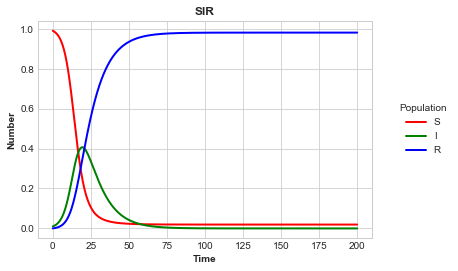

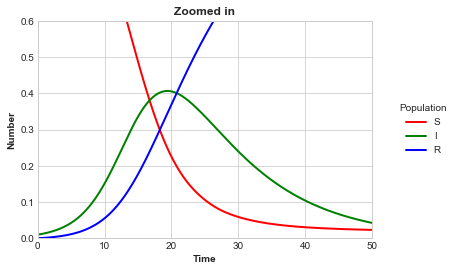

In [33]:
#SIR
sline = plt.plot("t","S","",data=sir_out,color="red",linewidth=2)
iline = plt.plot("t","I","",data=sir_out,color="green",linewidth=2)
rline = plt.plot("t","R","",data=sir_out,color="blue",linewidth=2)
plt.xlabel("Time",fontweight="bold")
plt.ylabel("Number",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)
plt.title("SIR",fontweight="bold")
plt.show()

#Zoom in
ax2 = plt.subplot()
plt.axis(xmin=0,xmax=50,ymin=0,ymax=0.6)  
sline = ax2.plot("t","S","",data=sir_out,color="red",linewidth=2)
iline = ax2.plot("t","I","",data=sir_out,color="green",linewidth=2)
rline = ax2.plot("t","R","",data=sir_out,color="blue",linewidth=2)
plt.xlabel("Time",fontweight="bold")
plt.ylabel("Number",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)

ax2.set_title('Zoomed in',fontweight="bold")
plt.show()

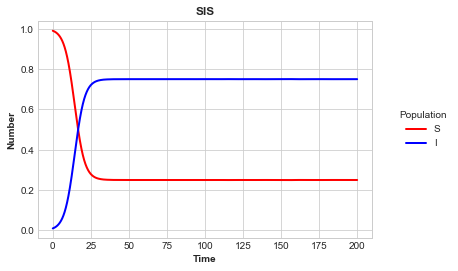

In [34]:
#SIS
sline = plt.plot("t","S","",data=sis_out,color="red",linewidth=2)
iline = plt.plot("t","I","",data=sis_out,color="blue",linewidth=2)
plt.xlabel("Time",fontweight="bold")
plt.ylabel("Number",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)
plt.title("SIS", fontweight="bold")
plt.show()